<h3> Neural Network <div style="float:right"><img class="w3-card-4"
     src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Logo_de_l%27acad%C3%A9mie_militaire_de_Saint-Cyr_Co%C3%ABtquidan.svg/1200px-Logo_de_l%27acad%C3%A9mie_militaire_de_Saint-Cyr_Co%C3%ABtquidan.svg.png"
                                                                          width="100px" object-position="right top"></div></h3>
<div style="clear:both"></div>

<center>
    <h1> Fonctions de plusieurs variables : calcul de dérivées et représentations graphiques  </h1>
</center>

In [1]:
%%html
<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-color:#a0cfc0;
  position: static;
}  
h2 {
  padding: 8px 12px;
  background-color:#f0cfc0;
  position: static;
}   
h3 {
  padding: 4px 8px;
  background-color:#f0cfc0;
  position: static;
}   
</style>

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import Latex

from pylab import *
from mpl_toolkits.mplot3d import Axes3D

# Dérivée
<div class="alert alert-success" role="alert"> Soit $f \colon I \to \mathbb{R}$ une fonction. Si elle existe, la dérivée de $f$ en $x_0 \in I$ est le nombre $$\displaystyle \lim_{x\rightarrow x_0}\frac{f(x)-f(x_0)}{x-x_0} = \lim_{h\rightarrow 0}\frac{f(x_0 + h)-f(x_0)}{h} = f'(x_0) = \frac{df}{dx}(x)$$ Une autre manière de voir cela est en considérant le développement de Taylor : $$ \forall h, \ \ f(x_0 + h) = f(x_0) + f'(x_0) \cdot h + h \varepsilon(h) \ \ \text{ avec } \displaystyle\lim_{h \rightarrow 0} \varepsilon(h) = 0 $$

Ainsi, $f'(x_0) \approx \dfrac{f(x_0 + h)-f(x_0)}{h}$ si $h$ est petit.
</div>

### Exemple :
Let $f(x) = \mathrm{exp}(x)$. We have $\frac{f(0 + h)-f(0)}{h} = \frac{e^h - 1}{h} \xrightarrow[h \to 0]{} 1$ so we prove that $f'(0) = 1$. 

### Exercice
<div class="alert alert-dark" role="alert">
   Ecrire une fonction Python qui calcule la dérivée approchée d'une fonction donnée $f$, avec un pas $h$ donné, en un point donné $x$.
</div>


In [3]:
def derivatives(f, x, h):
    df  = (f(x + h)-f(x))/(h)
    return df

In [4]:
derivatives(sin,0,0.001)

0.9999998333333416

### Exercice
<div class="alert alert-dark" role="alert">
Compléter le code suivant afin d'afficher le graphe d'une fonction et sa dérivée.</div>

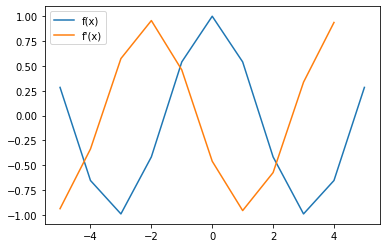

In [5]:
N = 11 
x = linspace(-5,5,N)
y = cos(x) # you can change the function f here
h = x[1]-x[0] # step of discretization

# values of the derivative
yp = (y[1:] - y[:-1]) / h

plot(x, y, label="f(x)")
plot(x[:-1], yp, label="f'(x)")

legend()
show()

## Calcul exact d'une dérivée

### Formules usuelles

https://en.wikipedia.org/wiki/Derivative#Rules_of_computation

### Règle des chaînes

<div class="alert alert-danger" role="alert">	
Soient deux fonctions réelles dérivables $f \colon x \mapsto f(x)$ et $x \colon t \mapsto x(t)$. La fonction $g \colon t \mapsto x(t) \mapsto f(x(t))$ est dérivable et :
    $$ g'(t) = f'(x(t)) \cdot x'(t) $$
</div>


# Fonctions de plusieurs variables et optimisation


## Définition
<div class="alert alert-success" role="alert">
	Une fonction à valeurs réelles de $n$ variables réelles est une fonction $f \colon \mathbb{R}^n \to \mathbb{R}^m$ qui associe $X = (x_1,...,x_n) \in \mathbb{R}^n$ à $f(X) \in \mathbb{R}^m$. 
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Real_function_of_two_real_variables.svg/800px-Real_function_of_two_real_variables.svg.png"
     alt="picture of multiple variables function"
     style="float: left; margin-right: 10px; width: 300px" />

<div class="alert alert-success" role="alert">
Soit $f$ une fonction $n$-aire. La dérivée partielle de $f$ dans la direction $x_i$ au point $(a_1, ..., a_n)$ est définie comme suit : 
	$$\frac{\partial f}{\partial x_i}(a_1, \ldots, a_n) = \lim_{h \to 0}\frac{f(a_1, \ldots, a_i+h,\ldots,a_n) - f(a_1,\ldots, a_i, \dots,a_n)}{h}.$$
</div>


#### Exemple
Soit $f \colon (x,y) \mapsto x^2 + 2xy - 2y^2$. Alors : 
$$\frac{\partial f}{\partial x}(x,y) = 2x+2y \qquad ; \qquad \frac{\partial f}{\partial y}(x,y) = 2x - 4y $$

### Gradient
<p>Soit <span class="math inline">\(f \colon \mathbf{R}^n \to \mathbf{R}\)</span>, son gradient <span class="math inline">\(\nabla f \colon \mathbf{R}^n \to \mathbf{R}^n\)</span> est défini au point <span class="math inline">\(p = (x_1,\ldots,x_n)\)</span> dans un espace de dimension <em>n</em> comme le vecteur : </p>

<p><span class="math inline">\(\nabla f(p) = \begin{bmatrix}\frac{\partial f}{\partial x_1}(p) \\ \vdots \\ \frac{\partial f}{\partial x_n}(p) \end{bmatrix}.\)</span></p>


#### Exercice : 
Définir une fonction qui calcule un gradient approximé en un point $x \in \mathbb{R}^n$. Prenons $\varepsilon = 10^{-8}$ comme précision.


In [6]:
epsilon=1e-8
def gradientApprox(f,x):
    fx=f(x)
    n=size(x)
    gra=zeros(n)
    for i in range(n):
        veps=zeros(n)
        veps[i]+=epsilon
        gra[i]=(f(x+veps)-fx)/epsilon
    return gra

In [7]:
def fa(X):  #X in R^2
    return 1 - 1 / (1 + 3 * X[0]**2 + X[1]**2)

In [8]:
X = array([1,1])
print(gradientApprox(fa,X))

[0.24 0.08]


### Règle des chaînes

#### 1er cas : $\mathbb{R} \to \mathbb{R}^2 \to \mathbb{R}$

Soit $f \colon (x,y) \mapsto f(x,y)$, $x \colon t \mapsto x(t)$ et $y \colon t \mapsto y(t)$.

Alors $g \colon t \mapsto (x(t),y(t)) \mapsto f(x(t),y(t))$ est différentiable et 
$$g'(t) = \frac{\partial f}{\partial x}(x(t),y(t)) \cdot x'(t) + \frac{\partial f}{\partial y}(x(t),y(t)) \cdot y'(t)$$


#### 2e cas : $\mathbb{R}^2 \to \mathbb{R}^2 \to \mathbb{R}$

Soit $f \colon (x,y) \mapsto f(x,y)$, $x \colon (t,u) \mapsto x(t,u)$ et $y \colon (t,u) \mapsto y(t,u)$.

Alors $g \colon (t,u) \mapsto (x(t,u),y(t,u)) \mapsto f(x(t,u),y(t,u))$ est différentiable et 
$$\frac{\partial g}{\partial t}(t,u) = \frac{\partial f}{\partial x}(x(t,u),y(t,u)) \cdot \frac{\partial x}{\partial t}(t,u) + \frac{\partial f}{\partial y}(x(t,u),y(t,u)) \cdot \frac{\partial y}{\partial t}(t,u)$$
$$\frac{\partial g}{\partial u}(t,u) = \frac{\partial f}{\partial x}(x(t,u),y(t,u)) \cdot \frac{\partial x}{\partial u}(t,u) + \frac{\partial f}{\partial y}(x(t,u),y(t,u)) \cdot \frac{\partial y}{\partial u}(t,u)$$


#### Exercice

Soit $f$ une fonction définie sur un domaine $D \subset \mathbb{R}^2$ par 	
$$f(x,y)= e^{\sqrt{x}y-x\sqrt{y}}$$ 
et deux fonctions $x$ et $y$ définies sur $\mathbb{R}$ par 	
$$x(t)=3t \quad y(t)=t(1-t).$$

Soit $G(t) = f(x(t),y(t))$. Calculez $G'(t)$ pour tout $t$ où $G$ est différentiable.


**Réponse** : par la règle des chaînes : $G'(t) = \frac{\partial f}{\partial x}(x(t),y(t)) \times x'(t) + 			\frac{\partial f}{\partial y}(x(t),y(t)) \times  y'(t) = \left( 3\left( \frac{t(1-t)}{2\sqrt{3t}} - \sqrt{t(1-t)} \right) + (1-2t)\left(\sqrt{3t} - \frac{3t}{2\sqrt{t(1-t)}} \right) \right) e^{\sqrt{3t}t(1-t)-3t\sqrt{t(1-t)}}$.

### Optimisation

<div class="alert alert-success" role="alert">
Soit <span class="math inline">\(f \colon \mathbf{R}^n \to \mathbf{R}\)</span>, un point critique / stationnaire est un vecteur $p = (x_1,\ldots,x_n)$ tel que $\nabla f(p) = 0$.
</div>

<div class="alert alert-danger" role="alert">	
Soit <span class="math inline">\(f \colon \mathbf{R}^n \to \mathbf{R}\)</span>, si $f$ admet un extremum local en $p$ alors $p$ est un point stationnaire.
</div>

If $n=2$, considering the second derivatives allows to classify critical points :

<img src="https://math.libretexts.org/@api/deki/files/11440/imageedit_9_5374076016.png?revision=1"
     alt="picture of multiple variables function"
     style="float: left; margin-right: 10px; width: 800px" />

More details here : 
https://math.libretexts.org/Courses/Monroe_Community_College/MTH_212_Calculus_III/Chapter_13%3A_Functions_of_Multiple_Variables_and_Partial_Derivatives/13.8%3A_Optimization_of_Functions_of_Several_Variables 

## Tracer des fonctions de deux variables

In [9]:
from mpl_toolkits.mplot3d import Axes3D

### Exercice
Soient 3 fonctions :
* $f_1(x,y) = \sqrt{1-\left(2-\sqrt{x^2+y^2}\right)^2 }$
* $f_2(x,y) = x^2 + \frac{10}{y^2+1}$
* $f_3(x,y) = 5(x^2+y^2)e^{-x^2-y^2}$

En complétant le code ci-dessous, réaliser les représentations graphiques de ces fonctions.

In [10]:
def f1(x,y):
    z=sqrt(1-(2-sqrt(x**2+y**2))**2)
    return z

In [11]:
n = 100
min = -3
max = 3
VX = linspace(min, max, n)
VY = linspace(min, max, n)
X, Y = meshgrid(VX, VY)
Z = f1(X, Y) 

D:\APPLICATIONS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


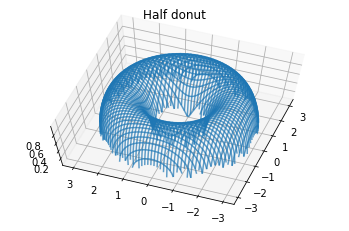

In [12]:
ax = axes(projection='3d')
ax.plot_wireframe(X, Y, Z,alpha=0.7)
ax.view_init(70, -160)
title('Half donut')
show()

In [13]:
def f2(x,y):
    z=x**2 + 10 / (y**2 + 1)
    return z

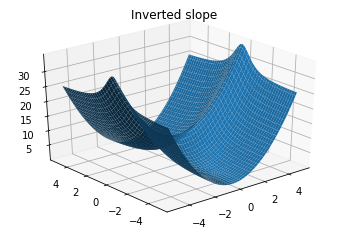

In [14]:
n = 100
min = -5
max = 5
VX = linspace(min, max, n)
VY = linspace(min, max, n)
X, Y = meshgrid(VX, VY)
Z = f2(X, Y)
ax = axes(projection = '3d')
ax.plot_surface(X, Y, Z)
ax.view_init(30, -130)
title('Inverted slope')
show()

In [15]:
def f3(x,y):
    z = 5 * (x**2 + y**2) * exp(-x**2 - y**2)
    return z

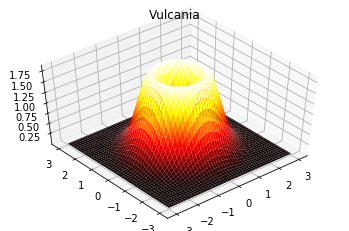

In [16]:
n = 100
min = -3
max = 3
VX = linspace(min, max, n)
VY = linspace(min, max, n)
X, Y = meshgrid(VX, VY)
Z = f3(X, Y)
ax = axes(projection = '3d')
ax.plot_surface(X, Y, Z,cmap = 'hot')
ax.view_init(50, -130)
title('Vulcania')
show()

### Exercice

Soit $f(x,y)=xe^{-x^2-y^2}$. En traçant cette fonction sur le carré $[-4;4]^2$, pensez-vous qu'elle admette des extrema locaux ?


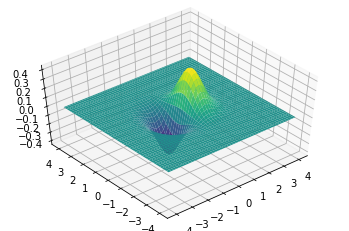

In [17]:
def f(x, y):
    z = x * exp(-x**2 - y**2)
    return z

n = 100
min = -4
max = 4
VX = linspace(min, max, n)
VY = linspace(min, max, n)
X, Y = meshgrid(VX, VY)
Z = f(X, Y)
ax = axes(projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')
ax.view_init(50, -130)
show()

En traçant certaines lignes de niveau, identifier les points stationnaires :

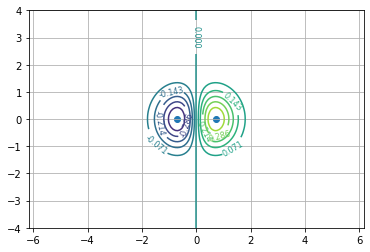

In [18]:
my_levels = linspace(-0.5,0.5,15)
levels = contour(X, Y, Z, my_levels, cmap='viridis')
grid()
clabel(levels, inline = 1, fontsize = 8)
scatter([1 / sqrt(2), -1 / sqrt(2)], [0, 0])
axis('equal')
show()

Définissez une fonction qui calcule le gradient exact de cette fonction $f$. Vérifiez que les points critiques que vous avez trouvés précédemment sont bien des points critiques.


In [19]:
def dfx(x, y):
    z=(1 - 2 * x**2) * exp(-x**2 - y**2)
    return z

def dfy(x, y):
    z=-2 * x * y * exp(-x**2 - y**2)
    return z

def gradientf(x, y):
    return array([dfx(x, y), dfy(x, y)])

gradientf(1/sqrt(2), -1/sqrt(2))

array([8.16856452e-17, 3.67879441e-01])

Voici une fonction pour visualiser les courbes de niveau dans un carré choisi :


In [20]:
def levelset(min, max):
    n = 100
    VX = linspace(min, max, n)
    VY = linspace(min, max, n)
    X, Y = meshgrid(VX, VY)
    Z = f(X, Y)
    my_levels = linspace(-0.4, 0.4, 50)  #display 50 levels between -0.4 and 0.4
    levels = contour(X, Y, Z, my_levels, cmap = 'viridis', alpha = 0.6)
    grid()
    clabel(levels, inline = 1, fontsize = 8)
    scatter([1/sqrt(2), -1/sqrt(2)], [0, 0])
    axis('equal')

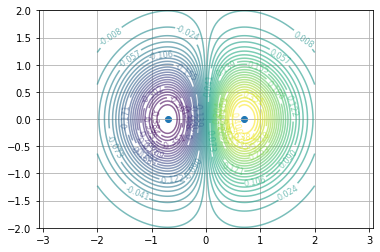

In [21]:
levelset(-2,2)
show()

In [22]:
def plot_gradient(x,y):
    M = array([x,y])  #define a point M with its coordinates
    arrow(M[0], M[1], gradientf(x, y)[0], gradientf(x, y)[1], width = 0.04, head_width = 0.08, color = 'red') #plot an arrow from point M, oriented by the gradient

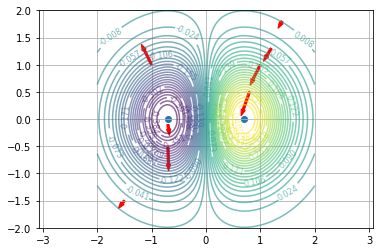

In [23]:
levelset(-2,2)
plot_gradient(-1,1)
plot_gradient(1,1)
plot_gradient(1.2,1.3)
plot_gradient(0.8,0.5)
plot_gradient(1.4,1.8)
plot_gradient(-0.7,-0.1)
plot_gradient(-0.7,-0.5)
plot_gradient(-1.5,-1.5)
show()

## Algorithme de descente de gradient

Les expériences ci-dessus constituent une première approche d'un algorithme qui fournit une suite convergeant vers des extrema locaux. Un algorithme bien connu est l'algorithme de descente de gradient, que nous utiliserons pour minimiser l'erreur dans les réseaux de neurones.


#### Algorithme : 
Il fournit une suite $x_0, x_1, ...$ définie par cet algorithme :
1. Calculer le gradient : $\nabla f(x_k)$ ;
2. Critère d'arrêt : $||\nabla f(x_k)||<\varepsilon$ ;
3. Choisir un pas $\alpha_k >0$ ;
4. Itération : $x_{k+1} = x_k - \alpha_k \nabla f(x_k)$.


#### Example with fixed step size

In [24]:
def gradientFixedStep(f, X0, step, eps, N = 200):
    lX = [X0]
    X = X0
    grad = gradientApprox(f,X0)
    n=0
    while norm(grad)>eps and n<N:
        n = n+1
        X = X - step*grad
        grad = gradientApprox(f,X)
        lX.append(X)
    return lX

On teste cet algorithme avec une fonction fa :

In [25]:
def fa(X):  #X in R^2
    return 1 - 1 / (1 + 3 * X[0]**2 + X[1]**2)

In [26]:
L = gradientFixedStep(fa, [1, 1], 0.2, 1e-5, 100)

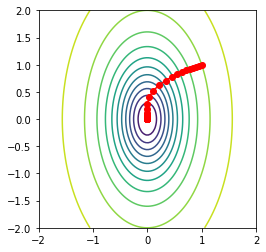

In [27]:
Lx0 = [X[0] for X in L]
Lx1 = [X[1] for X in L]
n = 100
min = -2
max = 2
VX = linspace(min, max, n)
VY = linspace(min, max, n)
Z=array([[fa(array([x0, x1])) for x0 in VX] for x1 in VY])
contour(VX, VY, Z, 12)
plot(Lx0, Lx1, "-ro")
axis('scaled')
show()